In [ ]:
import matplotlib
from matplotlib import pylab as plt
import nibabel as nib
from nibabel.viewers import OrthoSlicer3D

In [ ]:
import numpy as np
import os  # 遍历文件夹
import nibabel as nib  # nii格式一般都会用到这个包
import imageio  # 转换成图像

In [ ]:
from google.colab import drive
import os 
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/crossmoda2022_training/training_source/')

Mounted at /content/drive/


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [ ]:
import glob
#找到指定文件名的文件地址
def select_file(key,filepath):
  file_out_dir = filepath
  id_file = file_out_dir + key
  keyfilepath=glob.glob(id_file)
  print(len(keyfilepath))
  return keyfilepath

def split_file(originalfilepath,targer_file_path):
  if os.path.isfile(originalfilepath):
    shutil.copy(originalfilepath,targer_file_path)


In [ ]:
#转换nii文件到png文件
def nii_to_image(niifile):
    filenames = os.listdir(filepath)  #读取nii文件夹
    slice_trans = []
 
    for f in filenames:
        #开始读取nii文件
        img_path = os.path.join(filepath, f)
        img = nib.load(img_path)                #读取nii
        img_fdata = img.get_fdata()
        fname = f.replace('.nii.gz','')            #去掉nii的后缀名
        img_f_path = os.path.join(imgfile, fname)
        #创建nii对应的图像的文件夹
        if not os.path.exists(img_f_path):
          os.mkdir(img_f_path)                          #新建文件夹
 
        #开始转换为图像
        (x,y,z) = img.shape
        for i in range(z):
          silce = img_fdata[:, :, i]          #选择第36个切片
          imageio.imwrite(os.path.join(img_f_path,'{}.png'.format(i)), silce)
                                                #保存图像

In [ ]:
import shutil
#复制标签文件到标签文件夹
z=select_file('*_*_*_Label.nii.gz','/content/drive/MyDrive/crossmoda2022_training/training_source/')
for file in z:
  shutil.copy(file,'/content/drive/MyDrive/crossmoda2022_training/train_label/')




210


In [ ]:
#复制T1文件到T1文件夹
t1_file = select_file('*_*_*_ceT1.nii.gz','/content/drive/MyDrive/crossmoda2022_training/training_source/')
for file in t1_file:
  shutil.copy(file,'/content/drive/MyDrive/crossmoda2022_training/train_T1/')

210


In [ ]:
#将T1nii转为png
filepath = '/content/drive/MyDrive/crossmoda2022_training/train_T1'
imgfile = '/content/drive/MyDrive/crossmoda2022_training/train_png_T1' 
nii_to_image(filepath)

In [ ]:
#将T1标签nii转为png
filepath = '/content/drive/MyDrive/crossmoda2022_training/train_label'
imgfile = '/content/drive/MyDrive/crossmoda2022_training/train_png_label' 
nii_to_image(filepath)

In [ ]:
#将T2标签nii转为png
filepath = '/content/drive/MyDrive/crossmoda2022_training/training_target'
imgfile = '/content/drive/MyDrive/crossmoda2022_training/train_png_T2' 
nii_to_image(filepath)

In [ ]:
import shutil
#找出有label的切层
def select_image_label(filepath):
  filenames = os.listdir(filepath)
  i = 0
  image_label_path = []
  for f in filenames:
    img_path = os.path.join(filepath,f)
    img = cv2.imread(img_path)
    ret1,th1 = cv2.threshold(img,1,255,cv2.THRESH_BINARY)
    z = th1>0
    num_no_zero = np.sum(z)
    # image_label_path = []
    # i = 0
    if num_no_zero > 0:
      fname = f.replace('.png','')
      z=int(fname)
      i=i+1
      image_label_path.append(z)

  return image_label_path

In [ ]:
#将
filepath = '/content/drive/MyDrive/crossmoda2022_training/train_png_label'
filenames = os.listdir(filepath)
label_information=[]
i = 0
for f in filenames:
  img_path = os.path.join(filepath,f)
  z = select_image_label(img_path)
  label_information.append(z)

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import font_manager
percent_label_down = []
percent_label_up = []
i = 0
for i in range(len(label_information)):
  n = len(label_information[i])
  a = label_information[i][0]/119
  b = label_information[i][n-1]/119
  percent_label_up.append(a)
  percent_label_down.append(b)
  i = i + 1
print(percent_label_up)
print(min(percent_label_up))
print(percent_label_down)
print(max(percent_label_down))

In [ ]:
#Import all the required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.utils.vis_utils import plot_model
import pathlib
import imageio
import glob
import PIL

In [ ]:
import os
from PIL import Image
 
def save_resize_img(img_path, img_path_train, width, height):
    for i in os.listdir(img_path):
        image = os.path.join(img_path,i)
        img = Image.open(image)
        img = img.resize((width, height), Image.ANTIALIAS)
        img.save(img_path_train +  i)
           
if __name__ == '__main__':
    img_path = '/content/drive/MyDrive/crossmoda2022_training/train_png_T1/crossmoda2021_ldn_1_ceT1/'
    img_path_train = '/content/drive/MyDrive/crossmoda2022_training/train_resize_T1/crossmoda2021_ldn_1_ceT1/'
    save_resize_img(img_path,img_path_train, 256, 256)#注意路径后加  /

In [ ]:
if __name__ == '__main__':
    img_path = '/content/drive/MyDrive/crossmoda2022_training/train_png_T2/crossmoda2021_ldn_106_hrT2/'
    img_path_train = '/content/drive/MyDrive/crossmoda2022_training/train_resize_T2/crossmoda2021_ldn_106_hrT2/'
    save_resize_img(img_path,img_path_train, 256, 256)#注意路径后加  /

In [ ]:
data_dir_t1 = pathlib.Path("/content/drive/MyDrive/crossmoda2022_training/train_resize_T1/crossmoda2021_ldn_1_ceT1/")
data_dir_t2 = pathlib.Path("/content/drive/MyDrive/crossmoda2022_training/train_resize_T2/crossmoda2021_ldn_106_hrT2/")
print("T1 MRI images: ",len(list(data_dir_t1.glob('*.png'))))
print("T2 MRI images: ",len(list(data_dir_t2.glob('*.png'))))

T1 MRI images:  120
T2 MRI images:  80


In [ ]:
from PIL import Image
img1 = Image.open("/content/drive/MyDrive/crossmoda2022_training/train_resize_T1/crossmoda2021_ldn_1_ceT1/0.png")
img2 = Image.open("/content/drive/MyDrive/crossmoda2022_training/train_resize_T2/crossmoda2021_ldn_106_hrT2/0.png")
imgSize1 = img1.size
imgSize2 = img2.size

print(imgSize1,imgSize1)

(256, 256) (256, 256)


2. 数据准备


In [ ]:
# Initializing constants
BUFFER_SIZE = 1000
BATCH_SIZE = 16
EPOCHS = 125
img_height = 256
img_width = 256

In [ ]:
# T1 MRI images Train set
tr1_train = tf.keras.preprocessing.image_dataset_from_directory(
                              data_dir_t1,
                              label_mode=None,
                              seed=123,
                              validation_split = 0.25,
                              subset = 'training',
                              labels=None,
                              image_size = (img_height, img_width),
                              batch_size=BATCH_SIZE)

Found 120 files belonging to 1 classes.
Using 90 files for training.


In [ ]:
# TR1 Test set
tr1_test = tf.keras.preprocessing.image_dataset_from_directory(
                              data_dir_t1,
                              label_mode=None,
                              seed=123,
                              validation_split = 0.25,
                              subset = 'validation',
                              image_size=(img_height, img_width),
                              batch_size=1)

Found 120 files belonging to 1 classes.
Using 30 files for validation.


In [ ]:
# TR2 Train set
tr2_train = tf.keras.preprocessing.image_dataset_from_directory(
                              data_dir_t2,
                              label_mode=None,
                              seed=123,
                              validation_split = 0.07,
                              subset = 'training',
                              labels=None,
                              image_size = (img_height, img_width),
                              batch_size=BATCH_SIZE)

Found 80 files belonging to 1 classes.
Using 75 files for training.


In [ ]:
# TR2 Test set
tr2_test = tf.keras.preprocessing.image_dataset_from_directory(
                              data_dir_t2,
                              label_mode=None,
                              seed=123,
                              validation_split = 0.07,
                              subset = 'validation',
                              image_size=(img_height, img_width),
                              batch_size=1)

Found 80 files belonging to 1 classes.
Using 5 files for validation.


In [ ]:
# https://www.tensorflow.org/guide/data_performance
# https://stackoverflow.com/questions/56613155/tensorflow-tf-data-autotune
# https://stackoverflow.com/questions/46444018/meaning-of-buffer-size-in-dataset-map-dataset-prefetch-and-dataset-shuffle
AUTOTUNE = tf.data.experimental.AUTOTUNE
tr1_train = tr1_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
tr1_test = tr1_test.cache().prefetch(buffer_size=AUTOTUNE)

tr2_train = tr2_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
tr2_test = tr2_test.cache().prefetch(buffer_size=AUTOTUNE)

3. Data Preprocessing

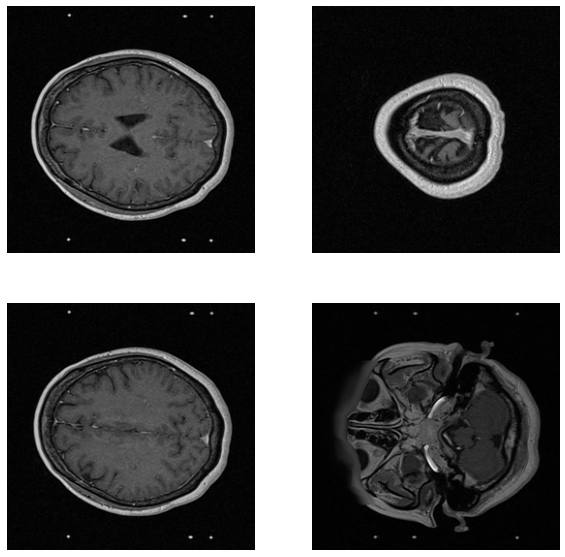

In [ ]:
# Plotting T1 MRI Scans
plt.figure(figsize=(10, 10))
for images in tr1_train.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

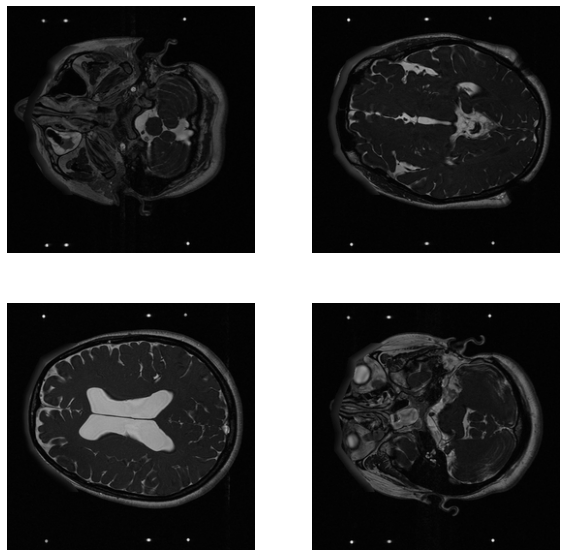

In [ ]:
# Plotting T2 MRI Scans
plt.figure(figsize=(10, 10))
for images in tr2_train.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# normalizing the images to [-1, 1]
def normalize(image):
    image = (image/127.5)-1
    return image

# Alternate
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
def preprocess_image_train(image):
    image = tf.image.random_flip_left_right(image)
    image = normalize(image)
    return image

3.2. Apply the function to both the datasets

In [ ]:
# process both classes of MRI images
tr1_train = tr1_train.map(lambda x: (preprocess_image_train(x)))
tr2_train = tr2_train.map(lambda x: (preprocess_image_train(x)))
tr1_test = tr1_test.map(lambda x: (preprocess_image_train(x)))
tr2_test = tr2_test.map(lambda x: (preprocess_image_train(x)))

Checking if images are noremalized between [-1 to 1]

In [ ]:
image_batch_tr1 = next(iter(tr1_train))
image_batch_tr2 = next(iter(tr2_train))
tr1_1 = image_batch_tr1[0]
tr2_1 = image_batch_tr2[0]
# Notice the pixels values are now in `[-1,1]`.
print(np.min(tr1_1), np.max(tr1_1))
print(np.min(tr2_1), np.max(tr2_1))

-1.0 0.9764706
-1.0 0.9764706


3.3 Visualise the MRI images after processing

In [ ]:
sample_tr1 = next(iter(tr1_train))
sample_tr2 = next(iter(tr2_train))

In [ ]:
sample_tr1.shape

TensorShape([10, 256, 256, 3])

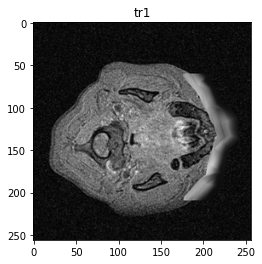

In [ ]:
plt.title('tr1')
plt.imshow(sample_tr1[0].numpy()[:, :, 0] * 0.5 + 0.5, cmap='gray')

In [ ]:
plt.title('tr2')
plt.imshow(sample_tr2[0].numpy()[:, :, 0] * 0.5 + 0.5, cmap='gray')


4. Model Building

In [ ]:
class InstanceNormalization(tf.keras.layers.Layer):
    '''
    Instance vs Batch nom.: https://stackoverflow.com/questions/45463778/instance-normalisation-vs-batch-normalisation
    Normalization: https://www.tensorflow.org/addons/tutorials/layers_normalizations
    '''
    def __init__(self, epsilon=1e-5):
        super(InstanceNormalization, self).__init__()
        self.epsilon = epsilon
    def build(self, input_shape):
        self.scale = self.add_weight(
            name='scale',
            shape=input_shape[-1:],
            initializer=tf.random_normal_initializer(1., 0.02),
            trainable=True)
        self.offset = self.add_weight(
            name='offset',
            shape=input_shape[-1:],
            initializer='zeros',
            trainable=True)
    def call(self, x):
        # https://www.tensorflow.org/api_docs/python/tf/nn/moments
        mean, variance = tf.nn.moments(x, axes=[1, 2], keepdims=True)
        inv = tf.math.rsqrt(variance + self.epsilon)
        normalized = (x - mean) * inv
        return self.scale * normalized + self.offset

In [ ]:
def downsample(filters, size, apply_norm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                                      kernel_initializer=initializer, use_bias=False))
    if apply_norm:
        result.add(InstanceNormalization())
    result.add(tf.keras.layers.LeakyReLU())
    return result

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2, padding='same',
                                               kernel_initializer=initializer, use_bias=False))
    result.add(InstanceNormalization())
    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))
    result.add(tf.keras.layers.ReLU())
    return result

In [ ]:
def unet_generator():
    down_stack = [
        downsample(64, 4, False), 
        downsample(128, 4), 
        downsample(128, 4), 
        downsample(128, 4), 
        downsample(128, 4) 
    ]
    up_stack = [
        upsample(128, 4, True), 
        upsample(128, 4, True),
        upsample(128, 4), 
        upsample(64, 4) 
    ]
        
    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(3, 4, strides=2, padding='same', kernel_initializer=initializer,
                                           activation='tanh') # (bs, 256, 256, 3)
    concat = tf.keras.layers.Concatenate()
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])
    x = inputs
    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)
    skips = reversed(skips[:-1])
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = concat([x, skip])
    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
generator_g = unet_generator() # Generates T2 images using T1 MRI Scans
generator_f = unet_generator() # Generates T1 images using T2 MRI Scans

In [ ]:
generator_g.summary()

In [ ]:
def discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
    x = inp
    down1 = downsample(64, 4, False)(x) # (bs, 16, 16, 64)
    down2 = downsample(128, 4)(down1)
    down3 = downsample(256, 4)(down2)
    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1, kernel_initializer=initializer,
                                  use_bias=False)(zero_pad1) # (bs, 31, 31, 512)
    norm1 = InstanceNormalization()(conv)
    leaky_relu = tf.keras.layers.LeakyReLU()(norm1)
    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)
    last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)
    return tf.keras.Model(inputs=inp, outputs=last)

In [ ]:
discriminator_x = discriminator()
discriminator_y = discriminator()

In [ ]:

discriminator_x.summary()

In [ ]:
sample_tr1.shape

TensorShape([10, 256, 256, 3])

In [ ]:
sample_tr2.shape

TensorShape([16, 256, 256, 3])

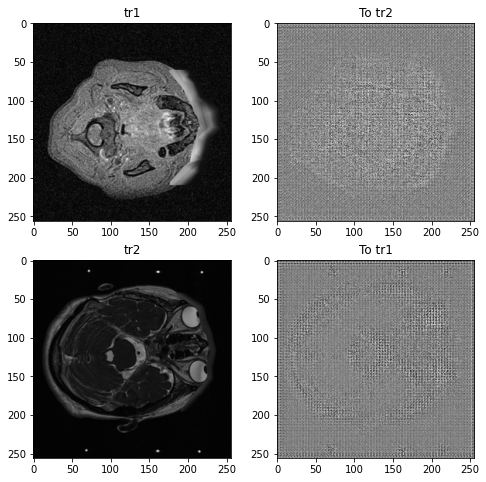

In [ ]:
# Performing Predicton on untrained model
to_tr2 = generator_g(sample_tr1)
to_tr1 = generator_f(sample_tr2)
plt.figure(figsize=(8, 8))
contrast = 8

imgs = [sample_tr1, to_tr2, sample_tr2, to_tr1]
title = ['tr1', 'To tr2', 'tr2', 'To tr1']

for i in range(len(imgs)):
    plt.subplot(2, 2, i+1)
    plt.title(title[i])
    if i % 2 == 0:
        plt.imshow(imgs[i][0].numpy()[:, :, 0] * 0.5 + 0.5, cmap='gray')
    else:
        plt.imshow(imgs[i][0].numpy()[:, :, 0] * 0.5 * contrast + 0.5, cmap='gray')
plt.show()

4.3. Defining Loss Function

In [ ]:
LAMBDA = 10.0

In [ ]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:

def discriminator_loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real)
    generated_loss = loss_obj(tf.zeros_like(generated), generated)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss * 0.5 # mean of losses

In [ ]:
def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

In [ ]:
def calc_cycle_loss(real_image, cycled_image):
    '''
    Cycle consistency means that the recycled image should be closed to the original input 
    https://www.tensorflow.org/tutorials/generative/cyclegan
    '''
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
    return LAMBDA * loss1

In [ ]:
def identity_loss(real_image, same_image):
    '''
    Identity loss says that, if you fed image  to generator , it should yield the real image  or something close to image .
    '''
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return LAMBDA * 0.5 * loss

In [ ]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


5 Model Training


5.1. Initializing Checkpoint manager

In [ ]:
checkpoint_path = "./Trained_Model"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

# Ref: https://www.tensorflow.org/api_docs/python/tf/train/CheckpointManager
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print(f'Last Check Point: {ckpt_manager.latest_checkpoint}')
    print('Latest checkpoint restored!!')

Last Check Point: ./Trained_Model/ckpt-125
Latest checkpoint restored!!


In [ ]:
def generate_images(model1, test1, model2, test2):
    prediction1 = model1(test1)
    prediction2 = model2(test2)
    plt.figure(figsize=(10, 10))
    display_list = [test1[0], prediction1[0], test2[0], prediction2[0]]
    title = ['Input TR1 Image', 'Predicted TR2 Image', 'Input TR2 Image', 'Predicted TR1 Image']
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i].numpy()[:, :, 0] * 0.5 + 0.5, cmap='gray')
        plt.axis('off')
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

5.2. Training model for 250 EPOCHS

In [ ]:
# Ref: https://www.tensorflow.org/guide/function
@tf.function
def train_step(real_x, real_y):
    # persistent is set to True because the tape is used more than
    # once to calculate the gradients.
    with tf.GradientTape(persistent=True) as tape:
        # Generator G translates X -> Y
        # Generator F translates Y -> X.
        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)
        
        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)
        
        # same_x and same_y are used for identity loss.
        same_x = generator_f(real_x, training=True)
        same_y = generator_g(real_y, training=True)
        
        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)
        
        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)

        # calculate the loss
        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)
        
        total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)
        
        # Total generator loss = adversarial loss + cycle loss
        total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)
        
        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)
        
    # Calculate the gradients for generator and discriminator
    generator_g_gradients = tape.gradient(total_gen_g_loss, generator_g.trainable_variables)
    generator_f_gradients = tape.gradient(total_gen_f_loss, generator_f.trainable_variables)
    
    discriminator_x_gradients = tape.gradient(disc_x_loss, discriminator_x.trainable_variables)
    discriminator_y_gradients = tape.gradient(disc_y_loss, discriminator_y.trainable_variables)
    
    # Apply the gradients to the optimizer
    generator_g_optimizer.apply_gradients(zip(generator_g_gradients, generator_g.trainable_variables))
    generator_f_optimizer.apply_gradients(zip(generator_f_gradients, generator_f.trainable_variables))
    
    discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients, discriminator_x.trainable_variables))
    discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients, discriminator_y.trainable_variables))

In [ ]:
for image_x, image_y in tf.data.Dataset.zip((tr1_train, tr2_train)):
  print(image_x.shape,image_y.shape)

(16, 256, 256, 3) (16, 256, 256, 3)
(10, 256, 256, 3) (16, 256, 256, 3)
(16, 256, 256, 3) (16, 256, 256, 3)
(16, 256, 256, 3) (16, 256, 256, 3)
(16, 256, 256, 3) (11, 256, 256, 3)


In [ ]:
for epoch in range(1,EPOCHS+1):
    for image_x, image_y in tf.data.Dataset.zip((tr1_train, tr2_train)):
        train_step(image_x, image_y)
    generate_images(generator_g, sample_tr1, generator_f, sample_tr2)
    ckpt_save_path = ckpt_manager.save()
    print('Saving checkpoint for epoch', epoch, 'at', ckpt_save_path)

5.3. Performing prediction on test data

In [ ]:
for image_x, image_y in tf.data.Dataset.zip((tr1_test, tr2_test)):
  print(image_x.shape,image_y.shape)

(1, 256, 256, 3) (1, 256, 256, 3)
(1, 256, 256, 3) (1, 256, 256, 3)
(1, 256, 256, 3) (1, 256, 256, 3)
(1, 256, 256, 3) (1, 256, 256, 3)
(1, 256, 256, 3) (1, 256, 256, 3)


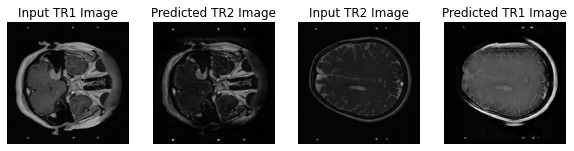

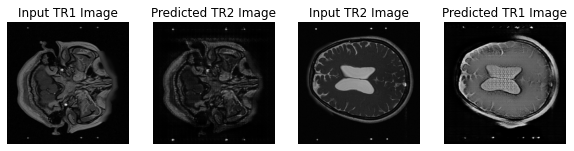

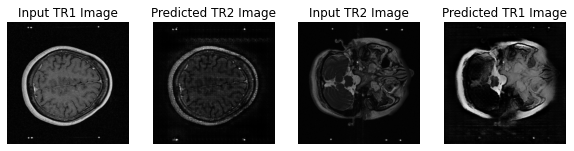

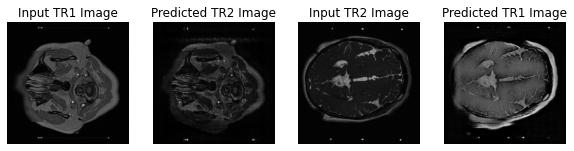

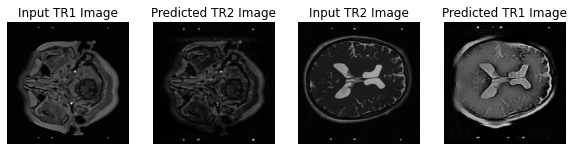

In [ ]:
for image_x, image_y in tf.data.Dataset.zip((tr1_test, tr2_test)):
  generate_images(generator_g, image_x, generator_f, image_y)

6. Segnment